In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip -u "/content/drive/My Drive/dub2_data.zip" -d "/content/drive/My Drive/dub2_projekt"

In [1]:
from scipy import ndimage
from matplotlib.pyplot import imshow
import torch

In [2]:
#!git clone https://TOKEN@github.com/mperic7/du2_projekt duboko_projekt

#data

In [3]:
from drive.MyDrive.duboko_projekt import faces_dataset, pickle_images2

In [16]:
#%run -i 'drive/MyDrive/duboko_projekt/pickle_images2.py'
from torchvision import transforms
# from drive.MyDrive.duboko_projekt.faces_dataset import FacesDataset
# dataset_x = FacesDataset("/content/drive/MyDrive/duboko_projekt/dub2_data/subset_1000/pickled/celeba_hq_256", transform=transforms.ToTensor())
# dataset_y = FacesDataset("/content/drive/MyDrive/duboko_projekt/dub2_data/subset_1000/pickled/avg_blurred_images", transform=transforms.ToTensor())

from faces_dataset import FacesDataset
dataset_x = FacesDataset("dub2_data\\pickled\\celeba_hq_256", transform=transforms.ToTensor())
dataset_avg_blurr = FacesDataset("dub2_data\\pickled\\avg_blurred_images", transform=transforms.ToTensor())
# dataset_gauss_blurr = FacesDataset("dub2_data\\pickled\\gauss_blurred_images", transform=transforms.ToTensor())
# dataset_y = torch.utils.data.ConcatDataset([dataset_avg_blurr, dataset_gauss_blurr])
dataset_y = dataset_avg_blurr

In [17]:
from torch.utils.data import DataLoader, SubsetRandomSampler
# K = 2000
# subsample_train_indices = torch.randperm(len(dataset_x))[:K]
# dataloader_x = DataLoader(dataset_x, batch_size=128, sampler=SubsetRandomSampler(subsample_train_indices))
# dataloader_y = DataLoader(dataset_y, batch_size=128, sampler=SubsetRandomSampler(subsample_train_indices))
dataloader_x = DataLoader(dataset_x, batch_size=128, shuffle=True)
dataloader_y = DataLoader(dataset_y, batch_size=128, shuffle=True)

In [15]:
from drive.MyDrive.duboko_projekt.networks import Generator, Discriminator

ModuleNotFoundError: No module named 'drive'

In [4]:
from networks import Generator, Discriminator

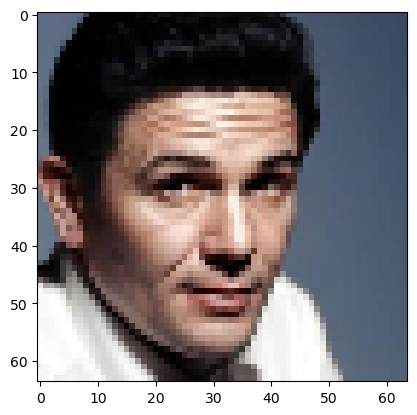

In [5]:
from PIL import Image
import numpy as np
def show_img(x):
    imshow(x.permute(1,2,0))
s = next(iter(dataloader_x))#.shape
show_img(s[0])

#training

In [18]:
gen_x = Generator(3, num_features=32)
gen_y = Generator(3, num_features=32)

disc_x = Discriminator(3, features=[64, 128, 256, 512])
disc_y = Discriminator(3, features=[64, 128, 256, 512])

In [19]:
pytorch_total_params = sum(p.numel() for p in gen_x.parameters() if p.requires_grad)
pytorch_total_params

1965059

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [21]:
gen_x = gen_x.to(device)
disc_x = disc_x.to(device)

gen_y = gen_y.to(device)
disc_y = disc_y.to(device)

In [22]:
gen_x.load_state_dict(torch.load('models\\gen_x_ckpt_lambda10.pt'))
gen_y.load_state_dict(torch.load('models\\gen_y_ckpt_lambda10.pt'))

<All keys matched successfully>

In [23]:
from tqdm import tqdm

Epoha 0


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.526]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


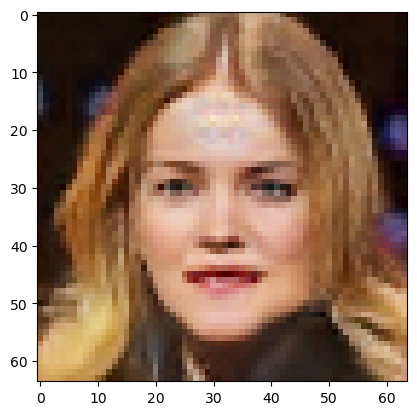

Epoha 1


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.639]


Epoha 2


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.491]


Epoha 3


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.603]


Epoha 4


100%|██████████| 234/234 [02:40<00:00,  1.45it/s, CYCLE_LOSS=0.44] 


Epoha 5


100%|██████████| 234/234 [02:39<00:00,  1.46it/s, CYCLE_LOSS=0.563]


Epoha 6


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.438]


Epoha 7


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.435]


Epoha 8


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.48] 


Epoha 9


100%|██████████| 234/234 [02:40<00:00,  1.45it/s, CYCLE_LOSS=0.467]


Epoha 10


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.497]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


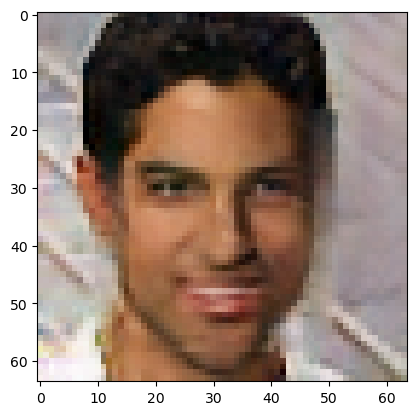

Epoha 11


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.484]


Epoha 12


100%|██████████| 234/234 [02:40<00:00,  1.45it/s, CYCLE_LOSS=0.422]


Epoha 13


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.44] 


Epoha 14


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.398]


Epoha 15


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.503]


Epoha 16


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.5]  


Epoha 17


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.427]


Epoha 18


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.488]


Epoha 19


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.42] 


Epoha 20


100%|██████████| 234/234 [02:39<00:00,  1.46it/s, CYCLE_LOSS=0.452]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


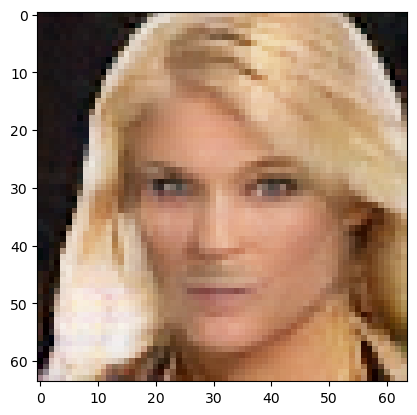

Epoha 21


100%|██████████| 234/234 [02:40<00:00,  1.45it/s, CYCLE_LOSS=0.434]


Epoha 22


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.405]


Epoha 23


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.481]


Epoha 24


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.425]


Epoha 25


100%|██████████| 234/234 [02:39<00:00,  1.46it/s, CYCLE_LOSS=0.437]


Epoha 26


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.39] 


Epoha 27


100%|██████████| 234/234 [02:40<00:00,  1.45it/s, CYCLE_LOSS=0.427]


Epoha 28


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.401]


Epoha 29


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.453]


Epoha 30


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.44] 
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


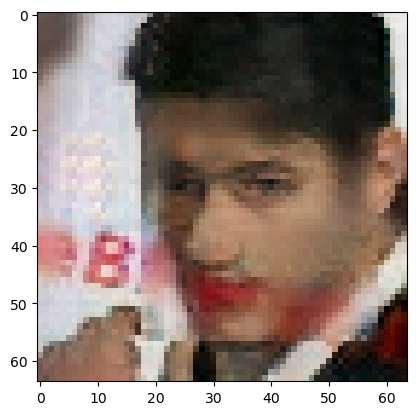

Epoha 31


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.428]


Epoha 32


100%|██████████| 234/234 [02:42<00:00,  1.44it/s, CYCLE_LOSS=0.443]


Epoha 33


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.428]


Epoha 34


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.512]


Epoha 35


100%|██████████| 234/234 [02:40<00:00,  1.45it/s, CYCLE_LOSS=0.491]


Epoha 36


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.405]


Epoha 37


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.391]


Epoha 38


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.5]  


Epoha 39


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.428]


Epoha 40


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.393]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


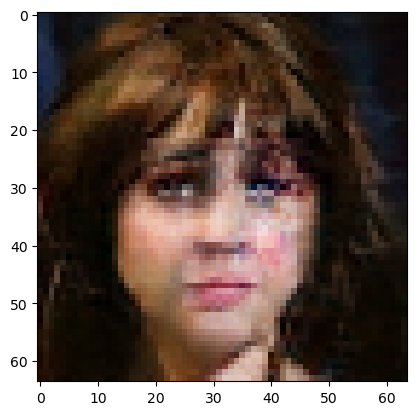

Epoha 41


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.43] 


Epoha 42


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.433]


Epoha 43


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.398]


Epoha 44


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.395]


Epoha 45


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.384]


Epoha 46


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.395]


Epoha 47


100%|██████████| 234/234 [02:42<00:00,  1.44it/s, CYCLE_LOSS=0.393]


Epoha 48


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.398]


Epoha 49


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.54] 


Epoha 50


100%|██████████| 234/234 [02:40<00:00,  1.45it/s, CYCLE_LOSS=0.383]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


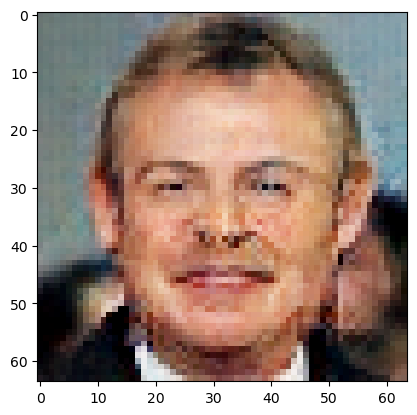

Epoha 51


100%|██████████| 234/234 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.397]


Epoha 52


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.374]


Epoha 53


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.462]


Epoha 54


100%|██████████| 234/234 [02:42<00:00,  1.44it/s, CYCLE_LOSS=0.361]


Epoha 55


100%|██████████| 234/234 [02:40<00:00,  1.45it/s, CYCLE_LOSS=0.444]


Epoha 56


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.442]


Epoha 57


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.435]


Epoha 58


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.465]


Epoha 59


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.381]


Epoha 60


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.345]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


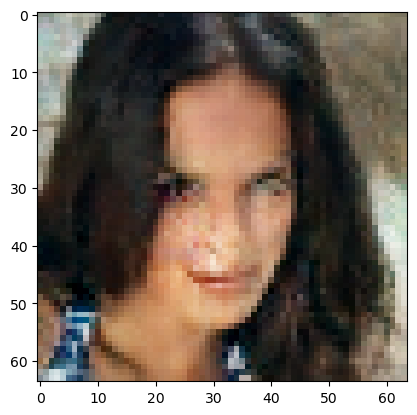

Epoha 61


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.378]


Epoha 62


100%|██████████| 234/234 [02:42<00:00,  1.44it/s, CYCLE_LOSS=0.406]


Epoha 63


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.387]


Epoha 64


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.365]


Epoha 65


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.376]


Epoha 66


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.371]


Epoha 67


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.418]


Epoha 68


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.363]


Epoha 69


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.379]


Epoha 70


100%|██████████| 234/234 [02:40<00:00,  1.45it/s, CYCLE_LOSS=0.452]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


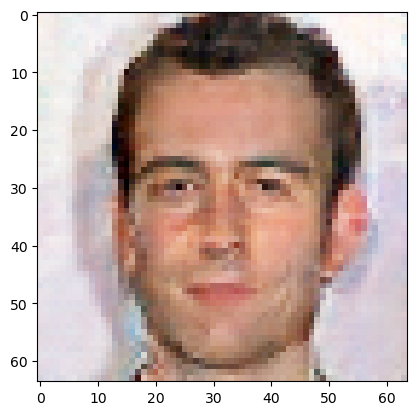

Epoha 71


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.426]


Epoha 72


100%|██████████| 234/234 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.407]


Epoha 73


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.426]


Epoha 74


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.434]


Epoha 75


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.4]  


Epoha 76


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.384]


Epoha 77


100%|██████████| 234/234 [02:42<00:00,  1.44it/s, CYCLE_LOSS=0.395]


Epoha 78


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.478]


Epoha 79


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.35] 


Epoha 80


100%|██████████| 234/234 [02:39<00:00,  1.46it/s, CYCLE_LOSS=0.42] 
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


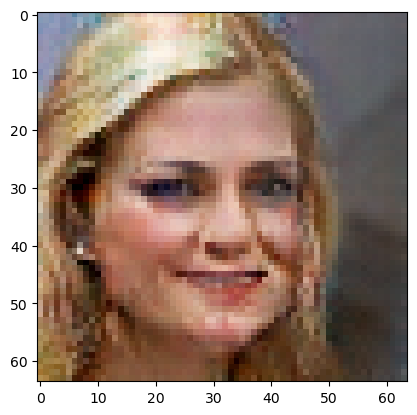

Epoha 81


100%|██████████| 234/234 [02:40<00:00,  1.45it/s, CYCLE_LOSS=0.392]


Epoha 82


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.391]


Epoha 83


100%|██████████| 234/234 [02:40<00:00,  1.46it/s, CYCLE_LOSS=0.369]


Epoha 84


100%|██████████| 234/234 [02:44<00:00,  1.43it/s, CYCLE_LOSS=0.472]


Epoha 85


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.395]


Epoha 86


100%|██████████| 234/234 [02:42<00:00,  1.44it/s, CYCLE_LOSS=0.392]


Epoha 87


100%|██████████| 234/234 [02:42<00:00,  1.44it/s, CYCLE_LOSS=0.392]


Epoha 88


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.414]


Epoha 89


100%|██████████| 234/234 [02:42<00:00,  1.44it/s, CYCLE_LOSS=0.392]


Epoha 90


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.404]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


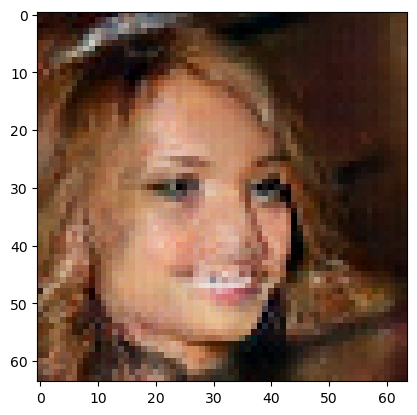

Epoha 91


100%|██████████| 234/234 [02:42<00:00,  1.44it/s, CYCLE_LOSS=0.405]


Epoha 92


100%|██████████| 234/234 [02:42<00:00,  1.44it/s, CYCLE_LOSS=0.395]


Epoha 93


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.406]


Epoha 94


100%|██████████| 234/234 [02:42<00:00,  1.44it/s, CYCLE_LOSS=0.428]


Epoha 95


100%|██████████| 234/234 [02:41<00:00,  1.45it/s, CYCLE_LOSS=0.371]


Epoha 96


100%|██████████| 234/234 [02:42<00:00,  1.44it/s, CYCLE_LOSS=0.378]


Epoha 97


100%|██████████| 234/234 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.385]


Epoha 98


100%|██████████| 234/234 [02:44<00:00,  1.42it/s, CYCLE_LOSS=0.374]


Epoha 99


100%|██████████| 234/234 [02:46<00:00,  1.41it/s, CYCLE_LOSS=0.384]


Epoha 100


100%|██████████| 234/234 [02:45<00:00,  1.42it/s, CYCLE_LOSS=0.372]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


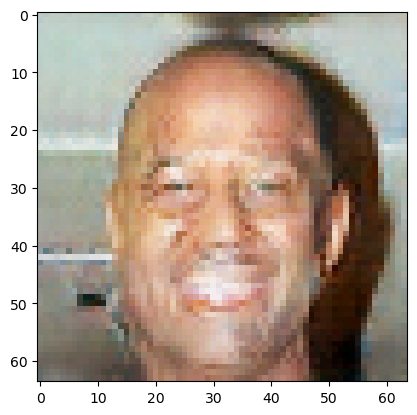

Epoha 101


100%|██████████| 234/234 [02:49<00:00,  1.38it/s, CYCLE_LOSS=0.39] 


Epoha 102


100%|██████████| 234/234 [02:50<00:00,  1.37it/s, CYCLE_LOSS=0.369]


Epoha 103


100%|██████████| 234/234 [02:50<00:00,  1.38it/s, CYCLE_LOSS=0.377]


Epoha 104


100%|██████████| 234/234 [02:50<00:00,  1.37it/s, CYCLE_LOSS=0.414]


Epoha 105


100%|██████████| 234/234 [02:49<00:00,  1.38it/s, CYCLE_LOSS=0.379]


Epoha 106


100%|██████████| 234/234 [02:50<00:00,  1.37it/s, CYCLE_LOSS=0.432]


Epoha 107


100%|██████████| 234/234 [02:51<00:00,  1.36it/s, CYCLE_LOSS=0.366]


Epoha 108


100%|██████████| 234/234 [02:48<00:00,  1.39it/s, CYCLE_LOSS=0.44] 


Epoha 109


100%|██████████| 234/234 [02:47<00:00,  1.40it/s, CYCLE_LOSS=0.359]


Epoha 110


100%|██████████| 234/234 [02:49<00:00,  1.38it/s, CYCLE_LOSS=0.42] 
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


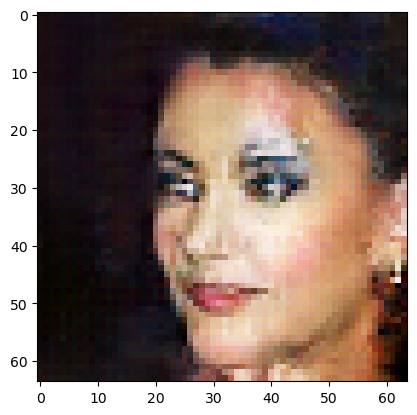

Epoha 111


100%|██████████| 234/234 [02:50<00:00,  1.37it/s, CYCLE_LOSS=0.379]


Epoha 112


100%|██████████| 234/234 [02:50<00:00,  1.37it/s, CYCLE_LOSS=0.401]


Epoha 113


100%|██████████| 234/234 [02:45<00:00,  1.42it/s, CYCLE_LOSS=0.361]


Epoha 114


100%|██████████| 234/234 [02:44<00:00,  1.43it/s, CYCLE_LOSS=0.415]


Epoha 115


100%|██████████| 234/234 [02:43<00:00,  1.43it/s, CYCLE_LOSS=0.383]


Epoha 116


100%|██████████| 234/234 [02:43<00:00,  1.43it/s, CYCLE_LOSS=0.38] 


Epoha 117


100%|██████████| 234/234 [02:44<00:00,  1.42it/s, CYCLE_LOSS=0.396]


Epoha 118


100%|██████████| 234/234 [02:43<00:00,  1.43it/s, CYCLE_LOSS=0.39] 


Epoha 119


100%|██████████| 234/234 [02:43<00:00,  1.43it/s, CYCLE_LOSS=0.396]


Epoha 120


100%|██████████| 234/234 [02:43<00:00,  1.43it/s, CYCLE_LOSS=0.37] 
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


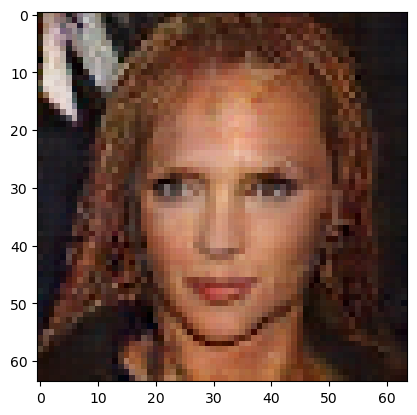

Epoha 121


100%|██████████| 234/234 [02:46<00:00,  1.40it/s, CYCLE_LOSS=0.357]


Epoha 122


100%|██████████| 234/234 [02:44<00:00,  1.42it/s, CYCLE_LOSS=0.377]


Epoha 123


100%|██████████| 234/234 [02:43<00:00,  1.43it/s, CYCLE_LOSS=0.388]


Epoha 124


100%|██████████| 234/234 [02:44<00:00,  1.43it/s, CYCLE_LOSS=0.368]


Epoha 125


100%|██████████| 234/234 [02:43<00:00,  1.43it/s, CYCLE_LOSS=0.419]


Epoha 126


100%|██████████| 234/234 [02:44<00:00,  1.42it/s, CYCLE_LOSS=0.378]


Epoha 127


100%|██████████| 234/234 [02:43<00:00,  1.43it/s, CYCLE_LOSS=0.369]


Epoha 128


100%|██████████| 234/234 [02:43<00:00,  1.43it/s, CYCLE_LOSS=0.373]


In [24]:
import torch
from matplotlib import pyplot as plt
import os
bce_loss = torch.nn.BCELoss()
l1_loss = torch.nn.L1Loss()

lambda_identity = 10
lambda_cycle = 10
epochs = 200-71
opt_disc = torch.optim.Adam(
        list(disc_x.parameters()) + list(disc_y.parameters()),
        lr=0.001,
        betas=(0.5, 0.999),
    )
opt_gen = torch.optim.Adam(
        list(gen_x.parameters()) + list(gen_y.parameters()),
        lr=0.001,
        betas=(0.5, 0.999),
    )

fig = plt.figure()
step = 0
for e in range(epochs):
    print("Epoha", e)
    pbar = tqdm(dataloader_x)
    for i, (x,y) in enumerate(zip(pbar, dataloader_y)):

        y = y[:x.shape[0]]

        opt_disc.zero_grad()
        opt_gen.zero_grad()

        x = x.to(device)
        y = y.to(device)


        fake_x = gen_x(y)
        disc_x_real = disc_x(x)
        dics_x_fake = disc_x(fake_x)

        fake_y = gen_y(x)
        disc_y_real = disc_y(y)
        dics_y_fake = disc_y(fake_y)

        identity_x = gen_x(x)
        identity_y = gen_y(y)

        cycle_y = gen_y(fake_x)


        #identity
        identity_loss = lambda_identity * (l1_loss(identity_x,x) + l1_loss(identity_y,y))
        #cycle
        cycle_loss = lambda_cycle * l1_loss(cycle_y,y)

        if step % 10 < 5: #update discriminator
            disc_x_gan_loss = bce_loss(disc_x_real, torch.ones_like(disc_x_real)) + bce_loss(dics_x_fake, torch.zeros_like(dics_x_fake))
            disc_y_gan_loss = bce_loss(disc_y_real, torch.ones_like(disc_y_real)) + bce_loss(dics_y_fake, torch.zeros_like(dics_y_fake))
            gan_loss = disc_x_gan_loss + disc_y_gan_loss

            disc_loss = gan_loss
            disc_loss.backward()
            opt_disc.step()

            #print(disc_loss)
        else: #update generator
            gen_x_gan_loss = bce_loss(disc_x_real, torch.zeros_like(disc_x_real)) + bce_loss(dics_x_fake, torch.ones_like(dics_x_fake))
            gen_y_gan_loss = bce_loss(disc_y_real, torch.zeros_like(disc_y_real)) + bce_loss(dics_y_fake, torch.ones_like(dics_y_fake))
            gan_loss = gen_x_gan_loss + gen_y_gan_loss
            gen_loss = gan_loss + identity_loss + cycle_loss
            gen_loss.backward()
            opt_gen.step()

            #print(gen_loss)

        pbar.set_postfix(CYCLE_LOSS=cycle_loss.item())
        # if step % 10 == 0:
        #     # print(gan_loss, identity_loss, cycle_loss)
        #     show_img(fake_x[0].cpu().detach())
        #     plt.show()
        #     torch.save(gen_x.state_dict(), os.path.join("models", "gen_x_ckpt.pt"))
        #     torch.save(gen_x.state_dict(), os.path.join("models", "gen_x_ckpt.pt"))
        step += 1

    if e % 10 == 0:
        show_img(fake_x[0].cpu().detach())
    plt.show()
    torch.save(gen_x.state_dict(), os.path.join("models", "gen_x_ckpt_lambda10.pt"))
    torch.save(gen_y.state_dict(), os.path.join("models", "gen_y_ckpt_lambda10.pt"))


In [19]:
SAVE_PATH = "/content/drive/MyDrive/duboko_projekt/dub2_data/subset_1000/"
torch.save(gen_x.state_dict(), SAVE_PATH + "gen_x.pth")
torch.save(gen_y.state_dict(), SAVE_PATH + "gen_y.pth")

torch.save(disc_x.state_dict(), SAVE_PATH + "disc_x.pth")
torch.save(disc_y.state_dict(), SAVE_PATH + "disc_y.pth")


In [71]:
gen_x.load_state_dict(torch.load('models\\gen_x_ckpt.pt'))
gen_y.load_state_dict(torch.load('models\\gen_y_ckpt.pt'))

<All keys matched successfully>

In [25]:
dataloader_x = DataLoader(dataset_x, batch_size=128, shuffle=False)
dataloader_y = DataLoader(dataset_y, batch_size=128, shuffle=False)

In [26]:
# dataloader_gauss = DataLoader(dataset_gauss_blurr, batch_size=128, shuffle=False)
dataloader_avg_blurr = DataLoader(dataset_avg_blurr, batch_size=128, shuffle=False)

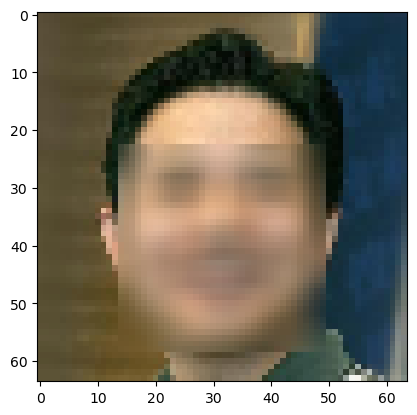

In [27]:
blurred = next(iter(dataloader_avg_blurr))[0]
show_img(blurred)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


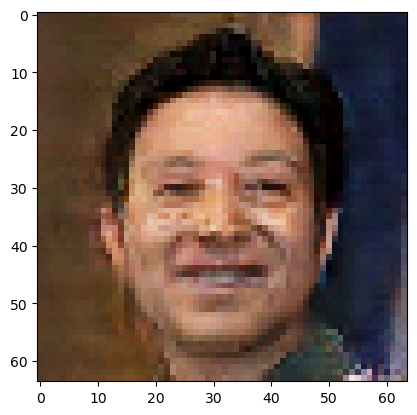

In [28]:
blurred = blurred.to(device)
fake = gen_x(blurred)
show_img(fake.detach().cpu())

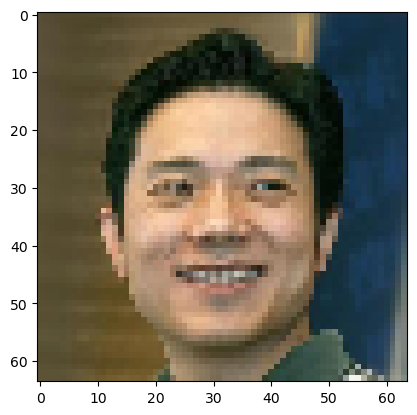

In [29]:
real = next(iter(dataloader_x))[0]
show_img(real)